## 1. Import What We Need

In [2]:
#import regular functionalities that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from IPython.display import display

#stats imports
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#classifiers to be used
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

#Model Selection Bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold
from sklearn.model_selection import learning_curve, validation_curve

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import mode

#evaluation
from sklearn.metrics import f1_score

#plotting
from sklearn.model_selection import learning_curve, validation_curve

#dataset
from sklearn.datasets import load_digits, make_classification

#pipelines
from sklearn.pipeline import Pipeline

## 2. Read the file

In [4]:
heart_disease_df=pd.read_csv('heart_2020_cleaned.csv')

## 3. Inspect the data (info, describe, head, tail)

In [6]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
#The results above indicate that there are 3 columns of floats (actual scores/decimals).
#The results also indicate that most of the results are 0,1 (No, Yes)

In [8]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
heart_disease_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [10]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


## 4. Clean the Data

In [12]:
heart_disease_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [13]:
#There are no blanks in the data

In [14]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [37]:
def convert_medical_data(input_file, output_file):
    # Load dataset
    heart_disease_df = pd.read_csv(input_file)

    # Mapping for binary columns (Yes/No -> 1/0)
    binary_columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", 
                      "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
    binary_map = {"Yes": 1, "No": 0}

    # Convert binary columns without triggering FutureWarning
    for col in binary_columns:
        heart_disease_df[col] = heart_disease_df[col].replace(binary_map)
        heart_disease_df[col] = heart_disease_df[col].astype("int8")  # Explicit conversion

    # Mapping for Sex column
    sex_map = {"Male": 0, "Female": 1}
    heart_disease_df["Sex"] = heart_disease_df["Sex"].replace(sex_map).astype("int8")

    # Mapping for GenHealth column (Ordinal Data)
    gen_health_map = {"Excellent": 0, "Very good": 1, "Good": 2, "Fair": 3, "Poor": 4}
    heart_disease_df["GenHealth"] = heart_disease_df["GenHealth"].replace(gen_health_map).astype("int8")

    # Mapping for AgeCategory column (Ordinal Data)
    age_map = {"18-24": 0, "25-29": 1, "30-34": 2, "35-39": 3, "40-44": 4, 
               "45-49": 5, "50-54": 6, "55-59": 7, "60-64": 8, "65-69": 9, 
               "70-74": 10, "75-79": 11, "80 or older": 12}
    heart_disease_df["AgeCategory"] = heart_disease_df["AgeCategory"].replace(age_map).astype("int8")

    # One-hot encoding for "Race"
    heart_disease_df = pd.get_dummies(heart_disease_df, columns=["Race"], prefix="Race", dtype="int8")

    # One-hot encoding for "Diabetic"
    heart_disease_df = pd.get_dummies(heart_disease_df, columns=["Diabetic"], prefix="Diabetic", dtype="int8")

    # Ensure entire DataFrame contains only integers
    heart_disease_df = heart_disease_df.infer_objects(copy=False)

    # Save the transformed dataset as CSV
    heart_disease_df.to_csv(output_file, index=False)
    print(f"Converted dataset saved to {output_file}")

# Example usage
input_file = "heart_2020_cleaned.csv"  # Replace with your actual filename
output_file = "heart_2020_converted.csv"
convert_medical_data(input_file, output_file)

C:\Users\Frank Fassos\AppData\Local\Temp\ipykernel_26364\786225146.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease_df[col] = heart_disease_df[col].replace(binary_map)
C:\Users\Frank Fassos\AppData\Local\Temp\ipykernel_26364\786225146.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease_df[col] = heart_disease_df[col].replace(binary_map)
C:\Users\Frank Fassos\AppData\Local\Temp\ipykernel_26364\786225146.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

Converted dataset saved to heart_2020_converted.csv


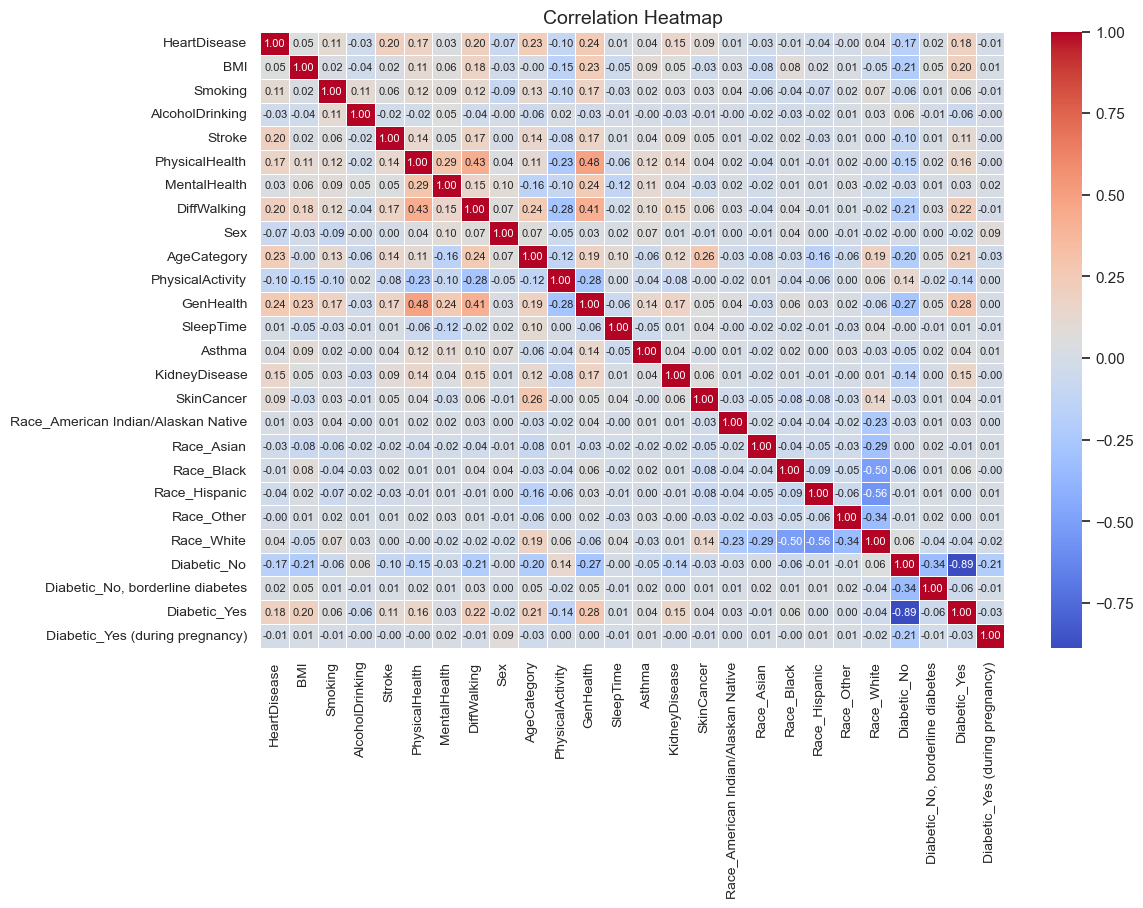

In [39]:
def generate_correlation_heatmap(input_file):
    # Load dataset
    heart_disease_df = pd.read_csv(input_file)

    # Ensure all data is numeric (removes non-numeric columns)
    heart_disease_df = heart_disease_df.select_dtypes(include=['number'])

    # Compute the correlation matrix
    corr_matrix = heart_disease_df.corr()

    # Plot the heatmap with a smaller font size
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
                linewidths=0.5, annot_kws={"size": 8})  # Adjust font size here
    plt.title("Correlation Heatmap", fontsize=14)  # Adjust title font size
    plt.xticks(fontsize=10)  # Adjust x-axis labels
    plt.yticks(fontsize=10)  # Adjust y-axis labels
    plt.show()

# Example usage
output_file = "heart_2020_converted.csv"
generate_correlation_heatmap(output_file)